# Some observations on the data below:
* People with age above 50 and avg_gulucose_level above 160 and married have a high chance of stroke
* 

In [11]:
### Imports

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Pre Process Data

In [13]:
#df =  pd.read_csv('healthcare-dataset-stroke-data.csv')
df =  pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [14]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [16]:
df.shape

(5110, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:>

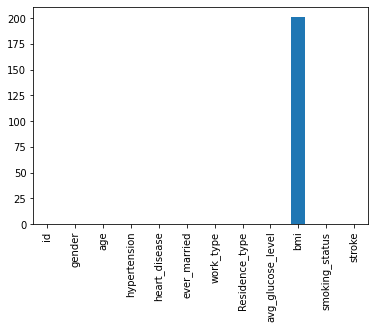

In [18]:
df.isna().sum().plot(kind = 'bar')

In [19]:
# Replace null values with mean
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(), inplace=True)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## EDA

In [21]:
categorical_columns = df.dtypes[df.dtypes == 'object'].index
numerical_columns = df.dtypes[df.dtypes != 'object'].index

In [22]:
categorical_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [23]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:>

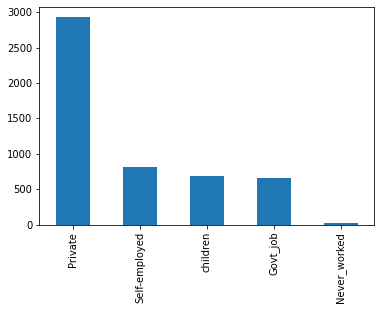

In [24]:
df['work_type'].value_counts().plot(kind = 'bar')

In [41]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [42]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<AxesSubplot:>

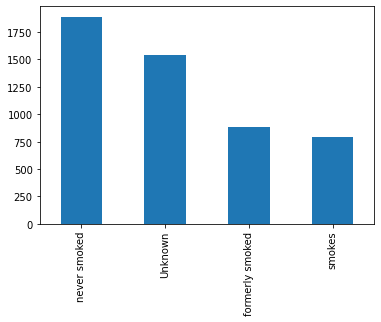

In [27]:
df['smoking_status'].value_counts().plot(kind = 'bar')

In [28]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [29]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [30]:
numerical_columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

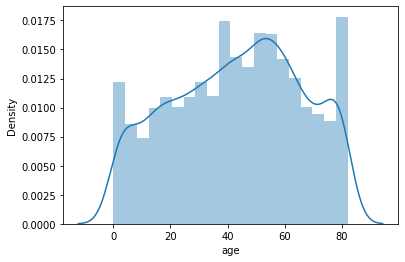

In [31]:
#df['age'].hist()
sns.distplot(df['age'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

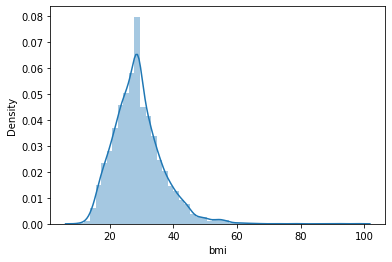

In [32]:
#df['bmi'].hist()
sns.distplot(df['bmi'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

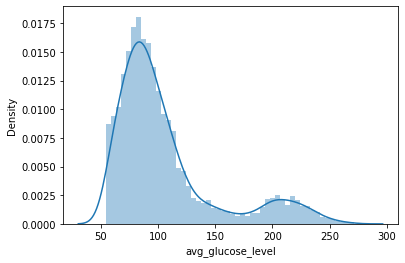

In [33]:
sns.distplot(df['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

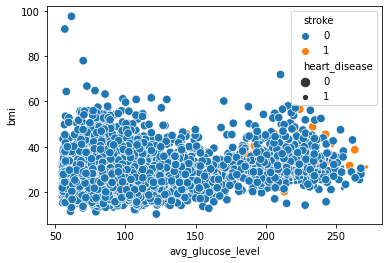

In [34]:
sns.scatterplot(x = 'avg_glucose_level',y = 'bmi',hue = 'stroke', size = 'heart_disease', data =df)

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

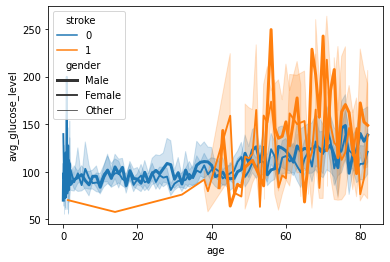

In [35]:
sns.lineplot(x = 'age',y = 'avg_glucose_level',hue = 'stroke',size='gender', data =df)

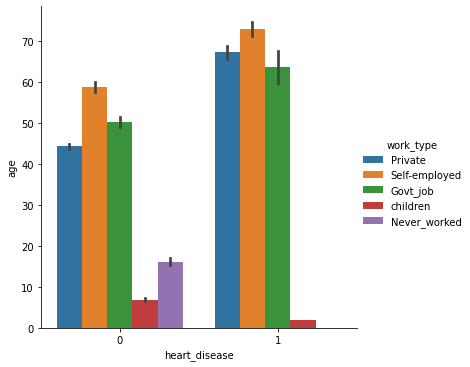

In [36]:
sns.catplot(x='heart_disease',y='age', hue="work_type", kind="bar", data=df)

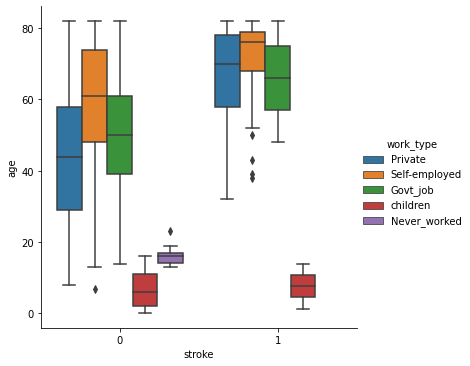

In [37]:
sns.catplot(x='stroke', y="age", hue = 'work_type', kind="box", data=df)

<AxesSubplot:>

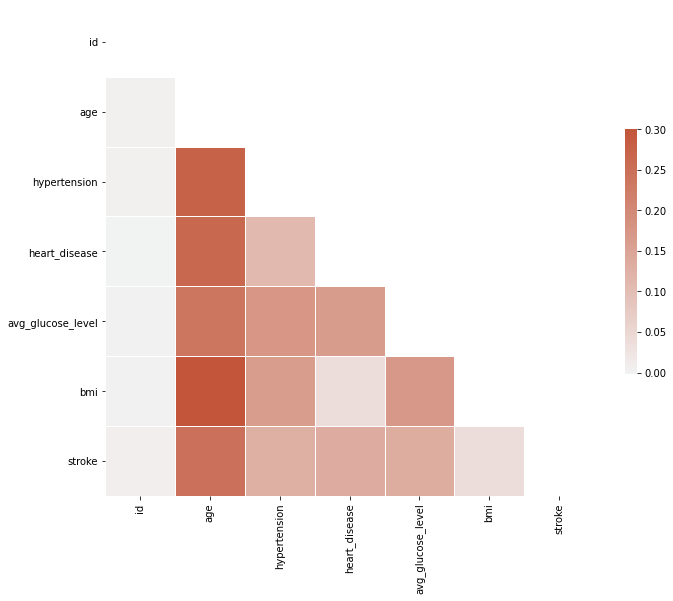

In [38]:
# Heat Map Correlation 
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


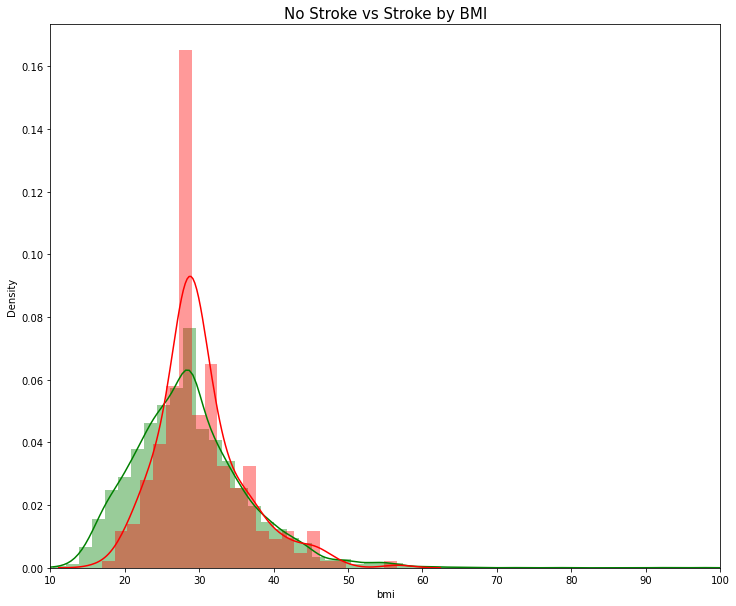

In [39]:
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

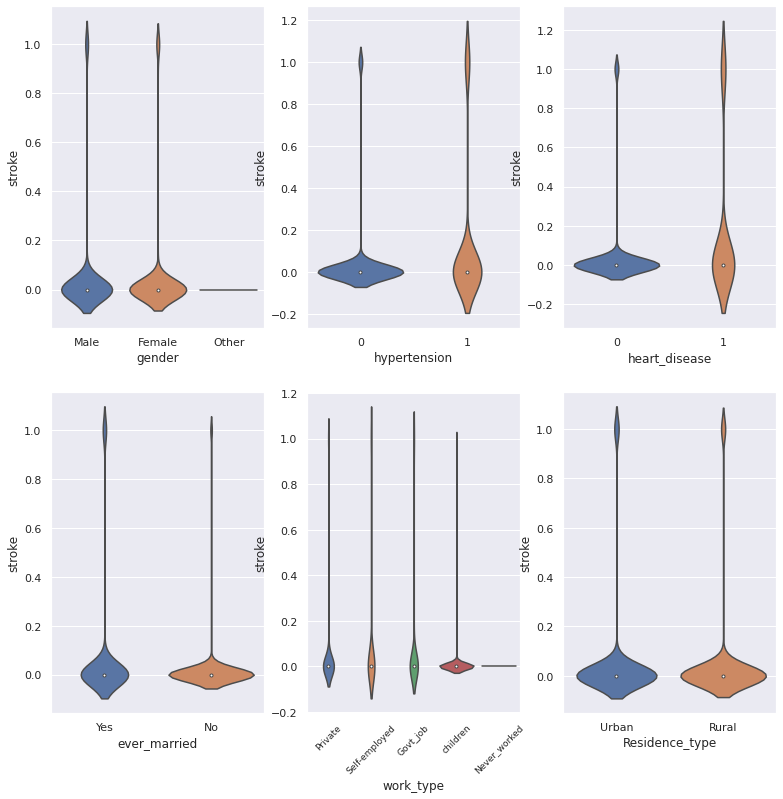

In [43]:
plt.figure(figsize=(13,13))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'stroke', data = df)
plt.subplot(2,3,2)
sns.violinplot(x = 'hypertension', y = 'stroke', data = df)
plt.subplot(2,3,3)
sns.violinplot(x = 'heart_disease', y = 'stroke', data = df)
plt.subplot(2,3,4)
sns.violinplot(x = 'ever_married', y = 'stroke', data = df)
plt.subplot(2,3,5)
sns.violinplot(x = 'work_type', y = 'stroke', data = df)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence_type', y = 'stroke', data = df)
plt.show()

#### Target value

In [40]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

## Data Preprocessing 

In [45]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

### Categorical Encoding 

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [50]:
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,5,9])], remainder= 'passthrough')
X = np.array(ct.fit_transform(X))

### Label Encoding 
columns: 'ever_married' and 'residence_type'

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()
X[:, 15] = le.fit_transform(X[:, 15])
X[:, 16] = le.fit_transform(X[:, 16])

### TREATING IMBALANCE CLASS USING SMOTE

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)

### SPLITTING OF DATASET INTO TRAIN AND TEST

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test, y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.33,random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [63]:
print("Number transactions x_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_valid dataset: ", X_valid.shape)
print("Number transactions y_valid dataset: ", y_valid.shape)
print("Number transactions x_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (6513, 19)
Number transactions y_train dataset:  (6513,)
Number transactions x_valid dataset:  (1604, 19)
Number transactions y_valid dataset:  (1604,)
Number transactions x_test dataset:  (1605, 19)
Number transactions y_test dataset:  (1605,)
